# Credit Card Fraud Prediction

__Anonymized credit card transactions labeled as fraudulent or genuine.__

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud/


## Connect to Azure ML Workspace

In [1]:
from azureml.core import Workspace, Dataset

ws = Workspace.from_config()

## Download dataset

Download dataset via:

- Kaggle API:

`
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip 310_23498_bundle_archive.zip
!rm 310_23498_bundle_archive.zip
`

- AzureML Dataset:

In [2]:
dataset = Dataset.get_by_name(ws, name='credit-card-fraud')
fraud_df = dataset.to_pandas_dataframe()

fraud_df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
196666,131630.0,-0.248966,0.896847,-1.032722,0.022275,-0.001968,-1.136997,1.311828,-0.030375,-0.527989,...,0.457744,1.108012,0.231589,-0.000303,-0.228540,-0.165670,-0.049818,0.053715,170.13,0
102435,68204.0,-0.806308,1.185333,1.202421,-0.196322,0.163735,-0.633848,0.711521,-0.087025,-0.143648,...,-0.287656,-0.671550,0.012064,-0.129644,-0.054336,0.097986,0.264879,0.157795,9.42,0
183780,125947.0,1.586449,-0.973883,-0.677539,0.373666,-0.598203,-0.056492,-0.328632,-0.005603,0.895395,...,0.374620,0.816179,-0.096871,-0.422297,-0.182213,-0.257359,0.000058,-0.014839,206.00,0
180823,124714.0,-0.348485,0.357079,-0.231739,-0.428114,1.890096,-1.055867,1.339435,-0.485839,-0.952405,...,0.301427,0.906232,-0.266323,0.841828,0.115418,0.283332,-0.094604,-0.067874,22.34,0
186142,126972.0,2.105085,-0.026665,-1.660721,-0.008811,0.586737,-0.369542,0.144668,-0.226839,0.306627,...,0.250758,0.911228,-0.157056,-1.033826,0.400281,-0.057448,-0.015096,-0.076681,1.00,0
25865,33801.0,-3.944814,-2.731477,1.524886,0.581633,2.889041,-2.797753,-0.622597,-0.157569,-0.176122,...,-0.411008,-0.746925,1.023530,0.353947,0.601898,0.049963,-0.277321,0.708951,1.79,0
106795,70126.0,1.277556,-0.610816,0.892278,-0.544745,-1.359652,-0.732516,-0.660553,-0.194665,-0.792412,...,-0.432291,-0.800227,0.145739,0.441356,-0.051301,0.848746,-0.027361,0.032348,51.11,0
55733,47099.0,-0.266085,0.839189,-0.925601,-1.046305,2.252691,3.184743,-0.215902,1.241660,-0.707970,...,0.086023,-0.014342,-0.080270,1.031870,-0.089648,0.306634,-0.109066,-0.038412,1.50,0
116992,74502.0,-8.075691,5.000522,-3.384022,1.014460,-3.602020,-0.043208,-2.525345,2.950160,1.157978,...,0.494446,0.018452,0.246436,0.171428,-0.094584,-0.573845,-3.999716,0.110647,51.82,0
200755,133564.0,1.744156,-0.747971,-1.432659,-0.081817,0.520311,1.080841,-0.228111,0.330107,0.916875,...,-0.025588,0.041444,0.135337,-1.622769,-0.270484,0.015149,0.001439,-0.068461,93.82,0


## EDA

In [3]:
fraud_df.shape

(284807, 31)

In [4]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.841366,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.958151e-16,-3.147640e-15,...,1.471982e-16,8.042109e-16,5.282450e-16,4.458267e-15,1.426896e-15,1.701640e-15,-3.671606e-16,-1.218152e-16,88.349619,0.001727
std,47488.228330,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84691.500000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.750000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(fraud_df['Class'].value_counts()[0]/len(fraud_df) * 100,2), '% of the dataset')
print('Frauds', round(fraud_df['Class'].value_counts()[1]/len(fraud_df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


## Split dataset

In [6]:
from sklearn.model_selection import train_test_split

seed = 314

# X
train_df, test_df = train_test_split(fraud_df, test_size=0.2, random_state=seed)

# Y
label = 'Class'

## Automatically train a model

### Set training settings

View:

- the full list of [settings](https://docs.microsoft.com/en-us/python/api/azureml-train-automl-client/azureml.train.automl.automlconfig.automlconfig?view=azure-ml-py)
- [featurization](https://docs.microsoft.com/en-us/azure/machine-learning/how-to-configure-auto-features).


In [7]:
import logging

# Set settings
automl_settings = {
    "iteration_timeout_minutes": 10,
    "experiment_timeout_minutes": 120,
    "iterations": 20,
    "primary_metric": 'AUC_weighted',
    "featurization": 'auto',
    "verbosity": logging.INFO,
    "n_cross_validations": 8
}


# Config AutoML task
from azureml.train.automl import AutoMLConfig

automl_config = AutoMLConfig(task='classification',
                             training_data=train_df,
                             label_column_name=label,
                             debug_log='logs/credit-card-fraud-automl.log',
                             **automl_settings)

### Run experiment on local machine

In [8]:
from azureml.core.experiment import Experiment

# Choose a name for the experiment and specify the project folder.
experiment_name = 'credit-card-fraud-automl'
experiment = Experiment(ws, experiment_name)

In [9]:
automl_run = experiment.submit(automl_config, show_output=True)

Running on local machine
Parent Run ID: AutoML_bdb9bd4e-3394-4a13-9005-d53263c92595

Current status: DatasetEvaluation. Gathering dataset statistics.
Current status: FeaturesGeneration. Generating features for the dataset.
Current status: DatasetFeaturization. Beginning to fit featurizers and featurize the dataset.
Current status: DatasetFeaturizationCompleted. Completed fit featurizers and featurizing the dataset.
Current status: DatasetBalancing. Performing class balancing sweeping
Current status: DatasetCrossValidationSplit. Generating individually featurized CV splits.

****************************************************************************************************
DATA GUARDRAILS: 

TYPE:         Class balancing detection
STATUS:       ALERTED
DESCRIPTION:  To decrease model bias, please cancel the current run and fix balancing problem.
              Learn more about imbalanced data: https://aka.ms/AutomatedMLImbalancedData
DETAILS:      Imbalanced data can lead to a falsely p

In [10]:
from azureml.widgets import RunDetails
RunDetails(automl_run).show()

_AutoMLWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', 's…

## Explore result

In [11]:
best_run, fitted_model = automl_run.get_output()

print(best_run)
print(fitted_model)

Run(Experiment: credit-card-fraud-automl,
Id: AutoML_bdb9bd4e-3394-4a13-9005-d53263c92595_18,
Type: None,
Status: Completed)
Pipeline(memory=None,
     steps=[('datatransformer', DataTransformer(enable_dnn=None, enable_feature_sweeping=None,
        feature_sweeping_config=None, feature_sweeping_timeout=None,
        featurization_config=None, force_text_dnn=None,
        is_cross_validation=None, is_onnx_compatible=None, logger=None,
        obser...6666666666666, 0.5333333333333333, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667]))])


## Score data

In [12]:
probs = fitted_model.predict_proba(test_df.drop(columns=label))
pred = probs[:, 1]

print(pred[:10])

[0.26662398 0.266696   0.26661525 0.26678379 0.26663234 0.26643279
 0.26781208 0.26671099 0.26653205 0.26674387]


## Evaluate model

In [13]:
import numpy as np
from sklearn import metrics

y_test = test_df[label]

fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

print(f'AUC: {roc_auc}')

AUC: 0.9820112108703682


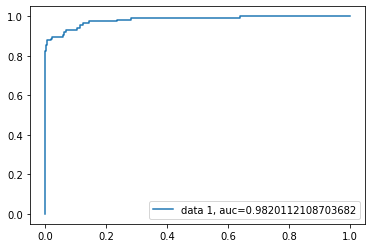

In [14]:
import matplotlib.pyplot as plt

auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
#from sklearn.metrics import precision_recall_fscore_support as score
#
#precision, recall, fscore, support = score(y_test, pred)
#
#print('precision: {}'.format(precision))
#print('recall: {}'.format(recall))
#print('fscore: {}'.format(fscore))
#print('support: {}'.format(support))